### Limits of Diversification

##### and the anatomy of cap-weighted portffolio and a bunch of cool Pandas stuff along the way

In [1]:
%load_ext autoreload 
%autoreload 2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import analysis_kit as ak

In [2]:
ind_return=ak.get_ind_returns()
ind_size= ak.get_ind_size()
ind_nfirms=ak.get_ind_nfirms()

In [3]:
ind_return.shape

(1110, 30)

In [4]:
ind_size.shape

(1110, 30)

In [5]:
ind_nfirms.shape

(1110, 30)

#### All three have the same number of rows and columns. This means we are set to go ahead.!

#### If we want to construct a market capitalization weighted index, first we need the market cap for each industry (i.e. 30) each month from 1926 to 2018

In [6]:
ind_mktcap=ind_size * ind_nfirms # Note that this is the average market cap for each industry each month starting at 01/1926

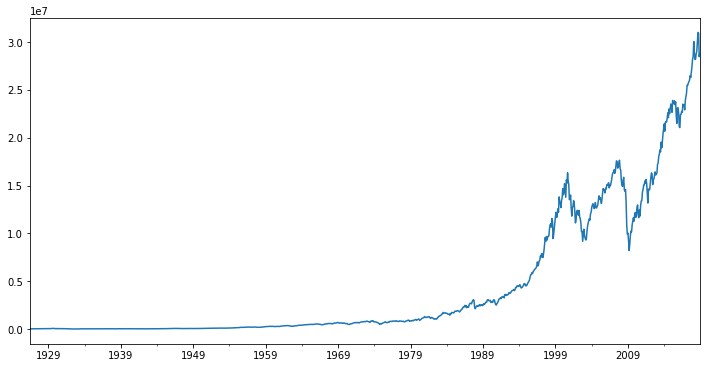

In [7]:
total_mktcap=ind_mktcap.sum(axis="columns") # This is adding up market cap values of each industry across the rows and plotting 
                                                                                # it
total_mktcap.plot(figsize=(12,6))

In [8]:
total_mktcap.head()

1926-07    26657.94
1926-08    27436.34
1926-09    28060.41
1926-10    28057.23
1926-11    27198.40
Freq: M, dtype: float64

#### But we are really after is the weights not the total market cap

All we have do to compute the weights is divide the industry market cap by the Total market cap at that point in time.

In [9]:
ind_capweight= ind_mktcap.divide(total_mktcap, axis="rows")

##### What the above code does is that it takes each industry's average market cap for each month and divides that by the Total Market Cap of the entire index

In [10]:
ind_capweight.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.058037,0.000801,0.035844,0.006935,0.000902,0.006683,0.008265,0.006701,0.036726,0.003014,...,0.065714,0.001531,0.014889,0.007956,0.185736,0.000089,0.057748,0.002435,0.008476,0.003639
1926-08,0.056578,0.000738,0.035264,0.006932,0.000972,0.006453,0.008673,0.006583,0.038497,0.002938,...,0.064380,0.001613,0.014732,0.008280,0.183379,0.000066,0.056014,0.002406,0.008258,0.003719
1926-09,0.056699,0.000917,0.036510,0.006810,0.001046,0.006038,0.008249,0.006668,0.039700,0.003109,...,0.064318,0.001609,0.014870,0.007873,0.187292,0.000068,0.054227,0.002339,0.008412,0.003879
1926-10,0.056920,0.000954,0.036736,0.007175,0.001028,0.006053,0.008139,0.006704,0.041486,0.003160,...,0.064896,0.001636,0.014850,0.007436,0.186812,0.000063,0.054280,0.002310,0.008280,0.003730
1926-11,0.056725,0.000951,0.038285,0.007047,0.001161,0.005924,0.008396,0.006831,0.040665,0.003269,...,0.066868,0.001642,0.015118,0.007236,0.187051,0.000054,0.054635,0.002279,0.008096,0.003521


#### Check whether all the weights for each month in each industry add up to 1

In [11]:
ind_capweight.sum(axis="columns")

1926-07    1.0
1926-08    1.0
1926-09    1.0
1926-10    1.0
1926-11    1.0
          ... 
2018-08    1.0
2018-09    1.0
2018-10    1.0
2018-11    1.0
2018-12    1.0
Freq: M, Length: 1110, dtype: float64

#### Similarly, we can also go ahead and compare how the weights of different industries have changed over time

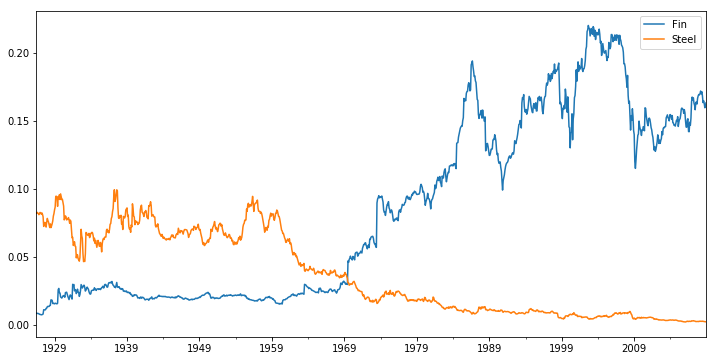

In [13]:
ind_capweight[["Fin","Steel"]].plot(figsize=(12,6)) # The diff between using a single sq. brackets and double sq. brackets is that
                                                    # the [] results in output that is of type "Series" whereas [[]] gives out
                                                    # a df.
                                                    # Furthermore, with [[]] we can select multiple columns from the DataFrame

#### Until now, we have got all the cap weights for the individual components in the entire market. With this, we can construct a cap-weighted market index just like the S&P 500.  

##### For that, first we need to compute the total market return. Note that the Total Market Return is nothing more than the weighted average of all the industry returns every month 

In [15]:
total_market_return= (ind_capweight * ind_return).sum(axis="columns")
total_market_return.head()

1926-07    0.031375
1926-08    0.028957
1926-09    0.005566
1926-10   -0.028504
1926-11    0.028039
Freq: M, dtype: float64

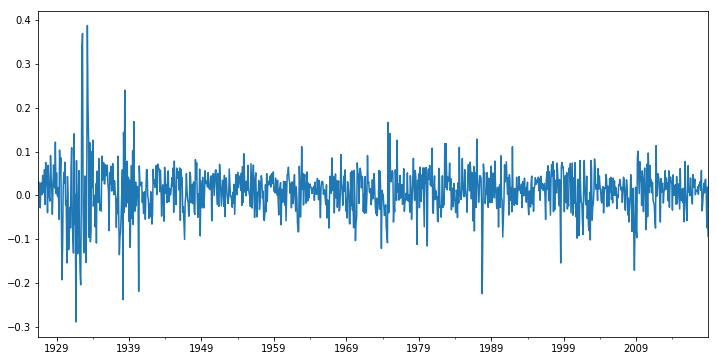

In [16]:
total_market_return.plot(figsize=(12,6))

#### Now, we shall take these returns and convert it into total market index. 

#### And, the total market index is nothing more than the wealth index derived from these above returns

In [18]:
total_market_index=ak.drawdown(total_market_return).Wealth

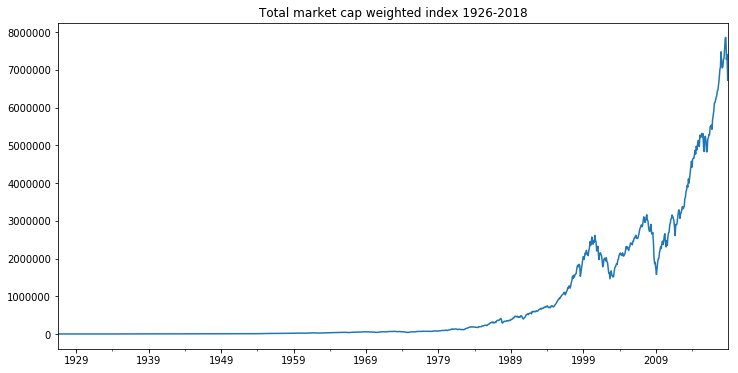

In [19]:
total_market_index.plot(figsize=(12,6), title="Total market cap weighted index 1926-2018")